# Mini Project 2 

In this assignment, you will try to find groups of similar customers in the dataset included in the uploaded folder. The dataset contains information about credit card behaviour of customers.  


### 1. Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors.nearest_centroid import NearestCentroid



/home/shopclues/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/shopclues/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### 2. Reading the dataset

In [2]:
data = pd.read_csv('CC GENERAL.csv')
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 3. Basic pre-processing

In [3]:
data = data.drop('CUST_ID', axis=1)
data.head()
data.fillna(method ='ffill', inplace = True)

### Scale the data [ x Marks] 

In [4]:
# scaling 
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data)
df_normalize = pd.DataFrame(x_scaled)
df_normalize.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.008210,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
5,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027603,0.031506,0.000000,1.0
6,0.032939,1.000000,0.144598,0.157076,0.030595,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.178771,0.449082,0.125279,0.002592,1.000000,1.0
7,0.095764,1.000000,0.008895,0.000000,0.019387,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.033520,0.075125,0.013388,0.006963,0.000000,1.0
8,0.053296,1.000000,0.017567,0.016228,0.008889,0.000000,0.333333,0.083333,0.250000,0.000000,0.00000,0.013966,0.232053,0.013570,0.004083,0.000000,1.0
9,0.007994,0.545455,0.026134,0.031442,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.00000,0.008380,0.365609,0.022964,0.001312,0.000000,1.0


## 4. Finding groups

### Approach 1

Plot the dendrograms for the above scaled dataset points. (hint: use scipy.cluster.hierarchy imported above). 
Plot using the following parameters:
1. ward
2. complete
3. average <br> 
Study the dendrograms and comment on the major differences between them.

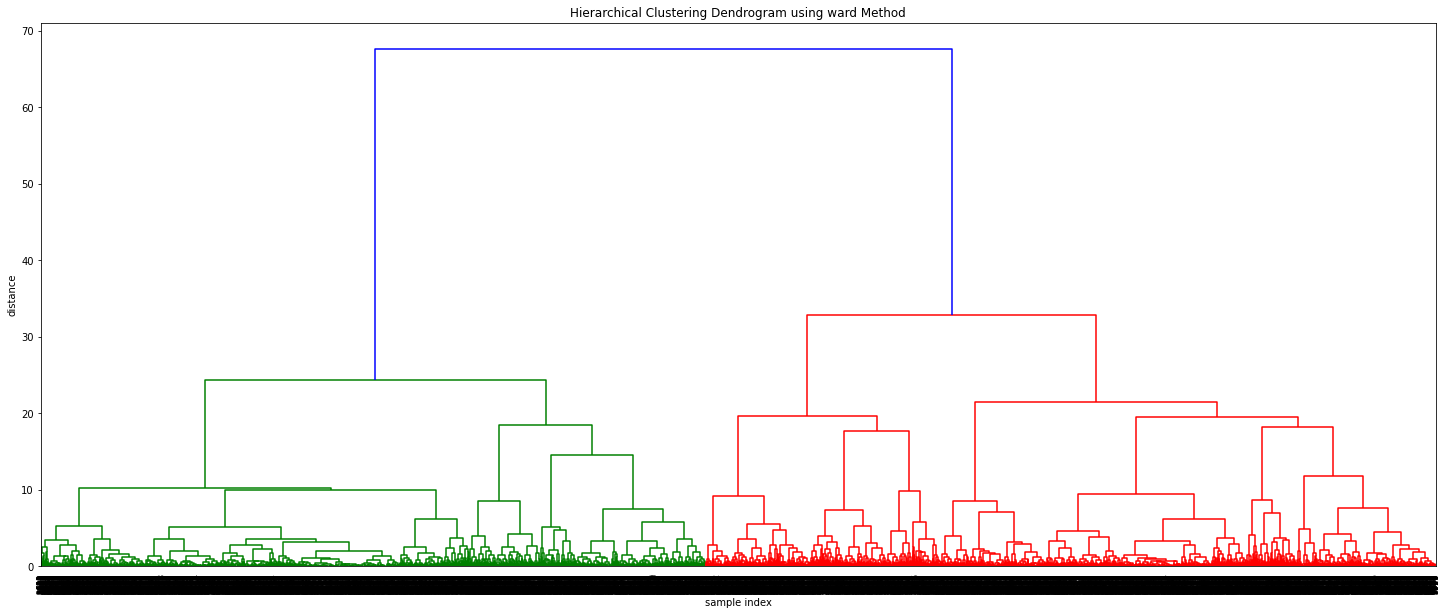

In [13]:
linkage_method = ['ward', 'complete','average']
# dendrograms 
Z = sch.linkage(df_normalize,method='ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram using ward Method')
plt.xlabel('data points')
plt.ylabel('distance')
sch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

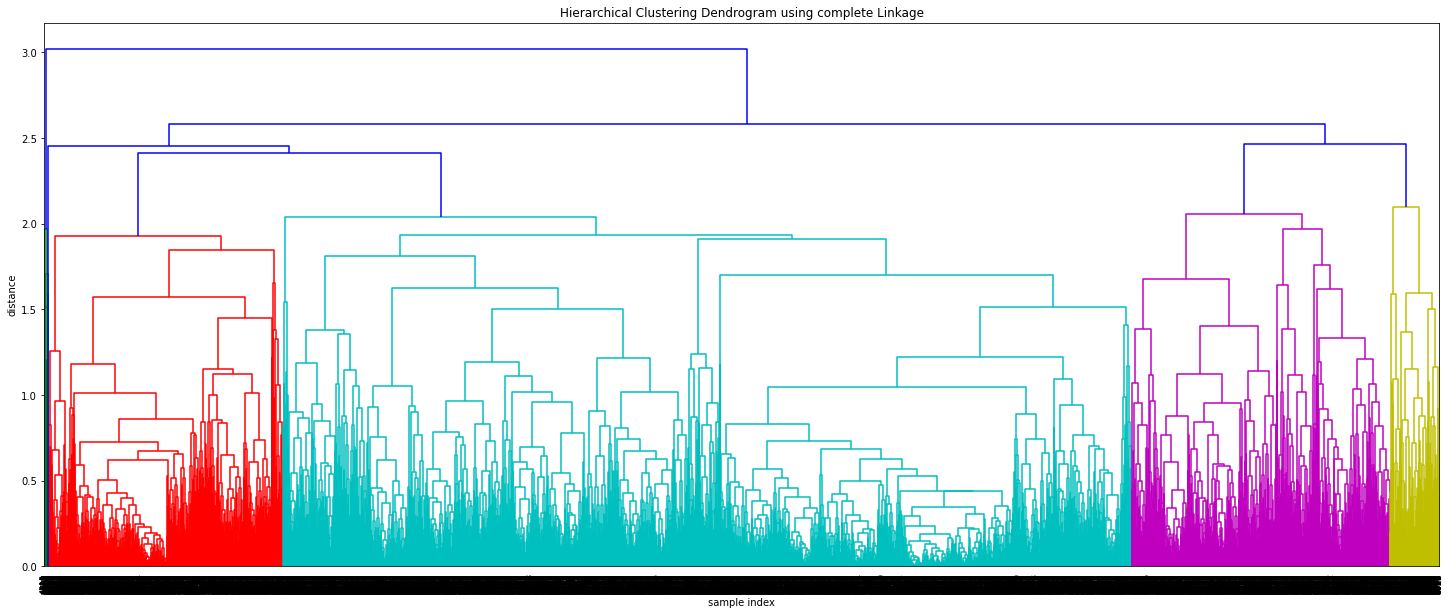

In [7]:
Z = sch.linkage(df_normalize,method='complete')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram using complete Linkage')
plt.xlabel('data points')
plt.ylabel('distance')
sch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

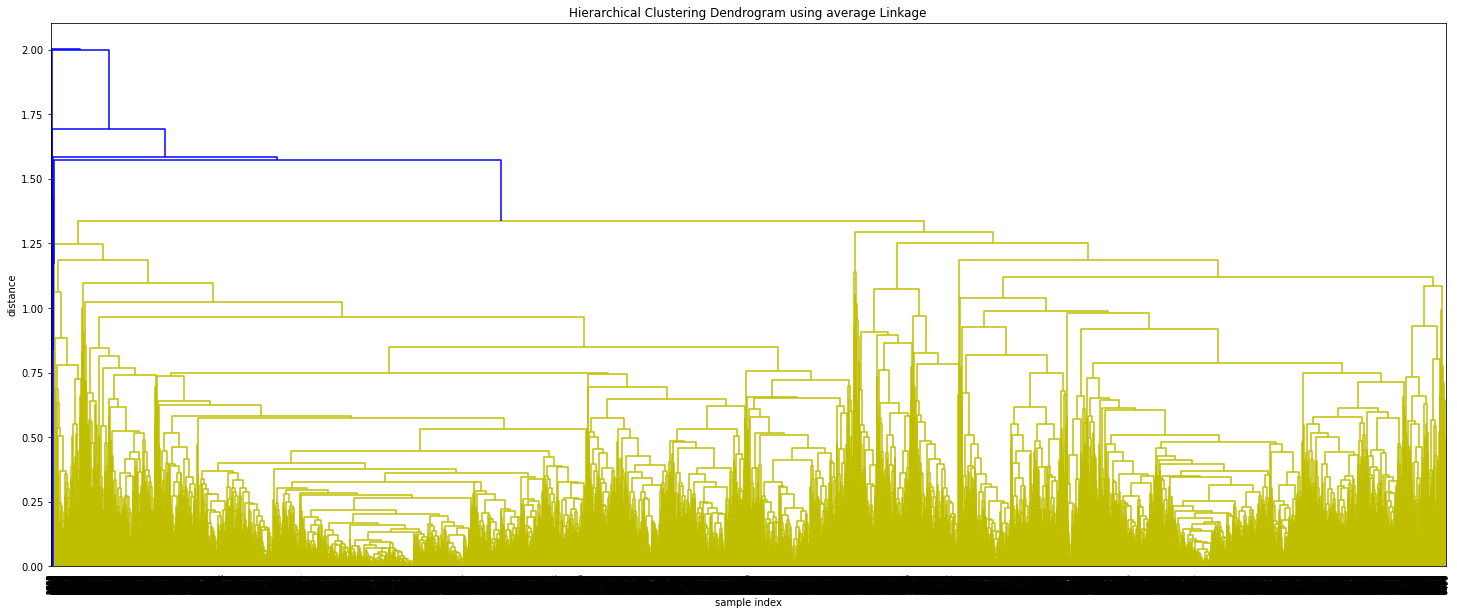

In [9]:
Z = sch.linkage(df_normalize,method='average')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram using average Linkage')
plt.xlabel('data points')
plt.ylabel('distance')
sch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

With the help of dendrograms obtained above, choose a suitable **k** for each linkage type. Experiment with different distance measures as mentioned below: <br>
1. Euclidean 
2. Manhattan 
3. Cosine <br> 
Calculate the cluster quality for each case and report your results in an organized, tabular format. The table should have the parameters used, cluster means and cluster quality.  

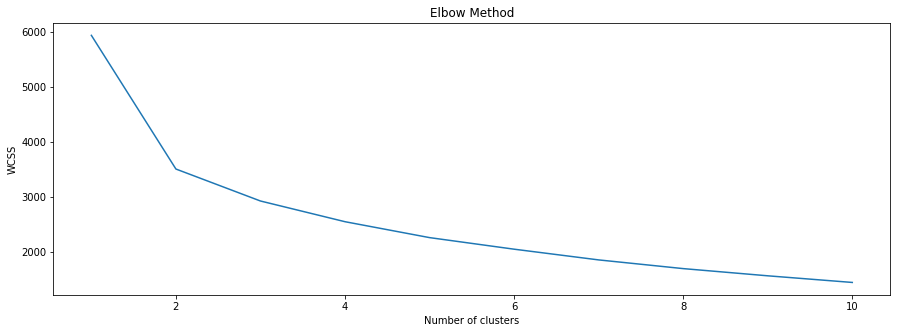

In [5]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(15,5))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_normalize)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

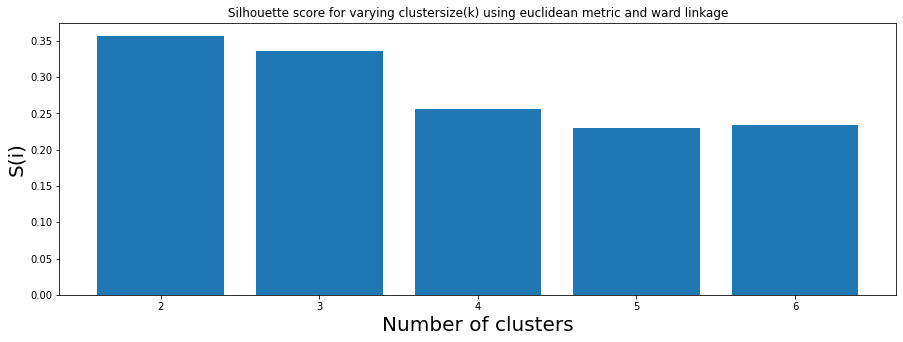

In [6]:
#Approch 1
#1a) Using Euclidean distance measure for AgglomerativeClustering for WARD linkage
from sklearn.metrics import silhouette_score
silhouette_scores = []
n_cluster_size = [2,3,4,5,6]

hc = []
for num in n_cluster_size:
     hc.append(AgglomerativeClustering(n_clusters= num,affinity= 'euclidean', linkage='ward'))
    
#calculate silhouette scores for each k value
for hc_index in hc:
    silhouette_scores.append(silhouette_score(df_normalize, 
                                          hc_index.fit_predict(df_normalize), metric='euclidean')) 

# Plotting a bar graph to compare the results 
fig = plt.figure(figsize=(15,5))
plt.bar(n_cluster_size, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.title('Silhouette score for varying clustersize(k) using euclidean metric and ward linkage')
plt.show()

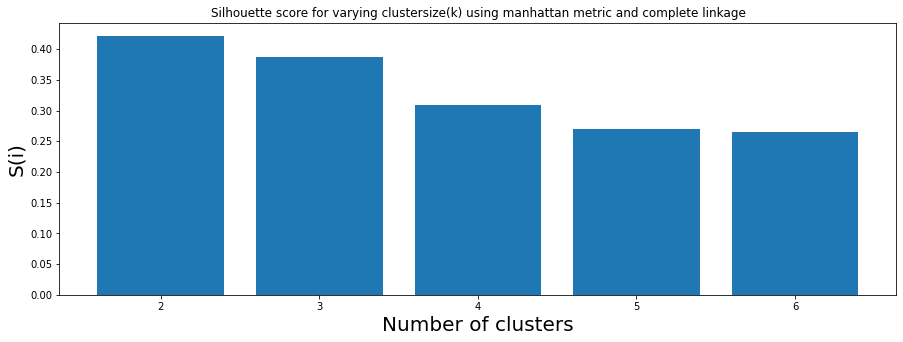

In [7]:
#1b) Using Manhattan distance measure for AgglomerativeClustering for complete linkage
silhouette_scores = []
n_cluster_size = [2,3,4,5,6]

hc = []
for num in n_cluster_size:
     hc.append(AgglomerativeClustering(n_clusters= num,affinity= 'manhattan', linkage='complete'))
    
#calculate silhouette scores for each k value
for hc_index in hc:
    silhouette_scores.append(silhouette_score(df_normalize, 
                                          hc_index.fit_predict(df_normalize), metric='manhattan')) 

# Plotting a bar graph to compare the results 
fig = plt.figure(figsize=(15,5))
plt.bar(n_cluster_size, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.title('Silhouette score for varying clustersize(k) using manhattan metric and complete linkage')
plt.show()

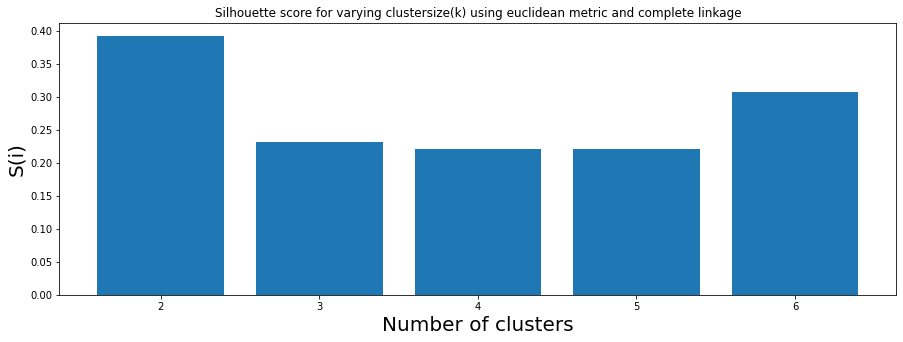

In [8]:
#1c) Using euclidean distance measure for AgglomerativeClustering for complete linkage
silhouette_scores = []
n_cluster_size = [2,3,4,5,6]

hc = []
for num in n_cluster_size:
     hc.append(AgglomerativeClustering(n_clusters= num,affinity= 'euclidean', linkage='complete'))
    
#calculate silhouette scores for each k value
for hc_index in hc:
    silhouette_scores.append(silhouette_score(df_normalize, 
                                          hc_index.fit_predict(df_normalize), metric='euclidean')) 

# Plotting a bar graph to compare the results 
fig = plt.figure(figsize=(15,5))
plt.bar(n_cluster_size, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.title('Silhouette score for varying clustersize(k) using euclidean metric and complete linkage')
plt.show()

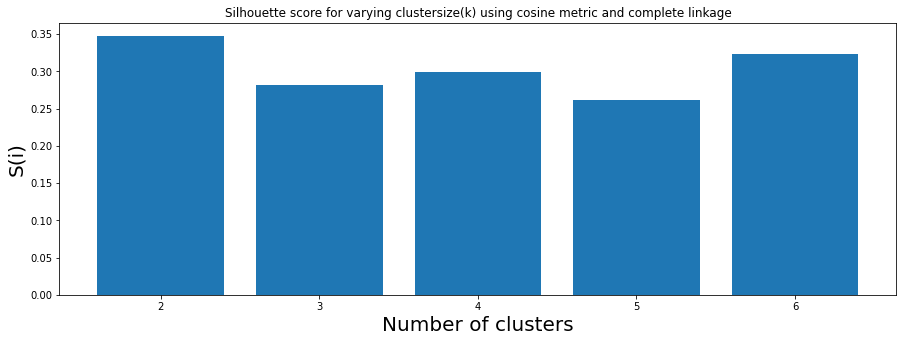

In [9]:
#1d) Using cosine distance measure for AgglomerativeClustering for Complete linkage
silhouette_scores = []
n_cluster_size = [2,3,4,5,6]

hc = []
for num in n_cluster_size:
     hc.append(AgglomerativeClustering(n_clusters= num,affinity= 'cosine', linkage='complete'))
    
#calculate silhouette scores for each k value
for hc_index in hc:
    silhouette_scores.append(silhouette_score(df_normalize, 
                                          hc_index.fit_predict(df_normalize), metric='cosine')) 

# Plotting a bar graph to compare the results 
fig = plt.figure(figsize=(15,5))
plt.bar(n_cluster_size, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.title('Silhouette score for varying clustersize(k) using cosine metric and complete linkage')
plt.show()

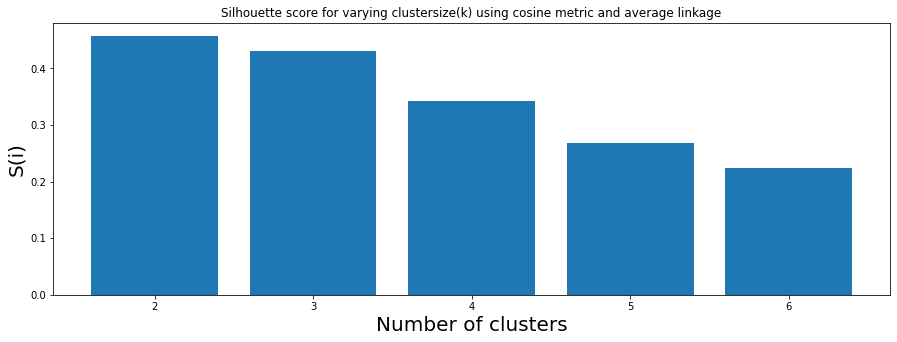

In [10]:
#1e) Using euclidean distance measure for AgglomerativeClustering for average linkage
silhouette_scores = []
n_cluster_size = [2,3,4,5,6]

hc = []
for num in n_cluster_size:
     hc.append(AgglomerativeClustering(n_clusters= num,affinity= 'euclidean', linkage='average'))
    
#calculate silhouette scores for each k value
for hc_index in hc:
    silhouette_scores.append(silhouette_score(df_normalize, 
                                          hc_index.fit_predict(df_normalize), metric='euclidean')) 

# Plotting a bar graph to compare the results 
fig = plt.figure(figsize=(15,5))
plt.bar(n_cluster_size, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.title('Silhouette score for varying clustersize(k) using cosine metric and average linkage')
plt.show()

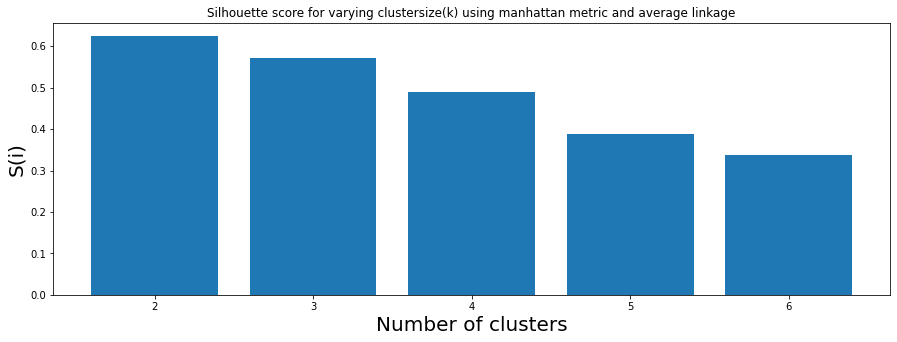

In [11]:
#1f) Using manhattan distance measure for AgglomerativeClustering for average linkage
silhouette_scores = []
n_cluster_size = [2,3,4,5,6]

hc = []
for num in n_cluster_size:
     hc.append(AgglomerativeClustering(n_clusters= num,affinity= 'manhattan', linkage='average'))
    
#calculate silhouette scores for each k value
for hc_index in hc:
    silhouette_scores.append(silhouette_score(df_normalize, 
                                          hc_index.fit_predict(df_normalize), metric='manhattan')) 

# Plotting a bar graph to compare the results 
fig = plt.figure(figsize=(15,5))
plt.bar(n_cluster_size, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.title('Silhouette score for varying clustersize(k) using manhattan metric and average linkage')
plt.show()

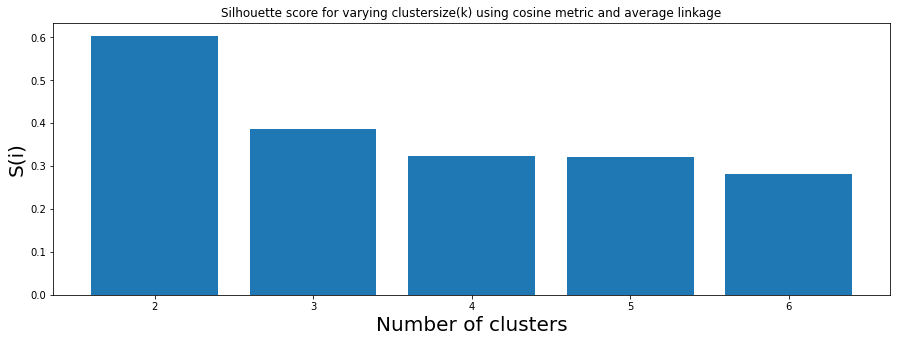

In [12]:
#1f) Using cosine distance measure for AgglomerativeClustering for average linkage
silhouette_scores = []
n_cluster_size = [2,3,4,5,6]

hc = []
for num in n_cluster_size:
     hc.append(AgglomerativeClustering(n_clusters= num,affinity= 'cosine', linkage='average'))
    
#calculate silhouette scores for each k value
for hc_index in hc:
    silhouette_scores.append(silhouette_score(df_normalize, 
                                          hc_index.fit_predict(df_normalize), metric='cosine')) 

# Plotting a bar graph to compare the results 
fig = plt.figure(figsize=(15,5))
plt.bar(n_cluster_size, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.title('Silhouette score for varying clustersize(k) using cosine metric and average linkage')
plt.show()

In [29]:
# clustering (hint: Use AgglomerativeClustering imported above)
#using euclidean distance and ward linkage method
mean_arr = []
euc_ward_hc = AgglomerativeClustering(
    n_clusters=2,
    affinity='euclidean',
    linkage='ward')

y1_hc = euc_ward_hc.fit_predict(df_normalize)

clf = NearestCentroid()
clf.fit(df_normalize, y1_hc)
mean_arr.append(np.mean(clf.centroids_))
print(y1_hc)


[1 1 0 ... 0 1 0]


In [30]:
# using manhattan distance method and complete linkage method
man_com_hc = AgglomerativeClustering(
    n_clusters=4,
    affinity='manhattan',
    linkage='complete',
)
y2_hc = man_com_hc.fit_predict(df_normalize)

clf = NearestCentroid()
clf.fit(df_normalize, y2_hc)
mean_arr.append(np.mean(clf.centroids_))
print(y2_hc)

[3 3 0 ... 0 3 0]


In [31]:
# using euclidean distance method and complete linkage method
euc_com_hc = AgglomerativeClustering(
    n_clusters=4,
    affinity='euclidean',
    linkage='complete',
)
y3_hc = euc_com_hc.fit_predict(df_normalize)

clf = NearestCentroid()
clf.fit(df_normalize, y3_hc)
mean_arr.append(np.mean(clf.centroids_))

print(y3_hc)

[0 0 1 ... 2 0 2]


In [32]:
# using cosine distance method and complete linkage method
cos_com_hc = AgglomerativeClustering(
    n_clusters=4,
    affinity='cosine',
    linkage='complete',
)
y4_hc = cos_com_hc.fit_predict(df_normalize)

clf = NearestCentroid()
clf.fit(df_normalize, y4_hc)
mean_arr.append(np.mean(clf.centroids_))

print(y4_hc)

[1 1 2 ... 0 1 0]


In [33]:
# using euclidean distance and average linkage method
euc_avg_hc = AgglomerativeClustering(
    n_clusters=2,
    affinity='euclidean',
    linkage='average',
)
y5_hc = euc_avg_hc.fit_predict(df_normalize)

clf = NearestCentroid()
clf.fit(df_normalize, y5_hc)
mean_arr.append(np.mean(clf.centroids_))

print(y5_hc)

[0 0 0 ... 0 0 0]


In [34]:
# using Manhattan distance and average linkage method
man_avg_hc = AgglomerativeClustering(
    n_clusters=2,
    affinity='manhattan',
    linkage='average',
)
y6_hc = man_avg_hc.fit_predict(df_normalize)

clf = NearestCentroid()
clf.fit(df_normalize, y6_hc)
mean_arr.append(np.mean(clf.centroids_))

print(y6_hc)

[0 0 0 ... 0 0 0]


In [35]:
# using Cosine distance and average linkage method
cos_avg_hc = AgglomerativeClustering(
    n_clusters=2,
    affinity='cosine',
    linkage='average',
)
y7_hc = cos_avg_hc.fit_predict(df_normalize)
clf = NearestCentroid()
clf.fit(df_normalize, y7_hc)
mean_arr.append(np.mean(clf.centroids_))
print(y7_hc)

[0 0 0 ... 0 0 0]


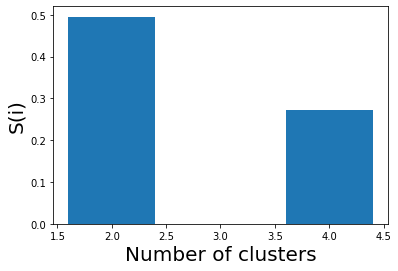

In [36]:
from sklearn.metrics import silhouette_score 
k = [2,4,4,4,2,2,2] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( silhouette_score(df_normalize, y1_hc)) 
silhouette_scores.append( silhouette_score(df_normalize, y2_hc)) 
silhouette_scores.append( silhouette_score(df_normalize, y3_hc)) 
silhouette_scores.append( silhouette_score(df_normalize, y4_hc)) 
silhouette_scores.append( silhouette_score(df_normalize, y5_hc)) 
silhouette_scores.append( silhouette_score(df_normalize, y6_hc)) 
silhouette_scores.append( silhouette_score(df_normalize, y7_hc)) 

  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

In [37]:
from tabulate import tabulate
affinity_used = ['euclidean','manhattan','euclidean','cosine','euclidean','manhattan','cosine']
linkage_used  = ['ward','complete','complete','complete','average','average','average']
table=[]
for i in range(len(affinity_used)):
    table.append([affinity_used[i], linkage_used[i],mean_arr[i],silhouette_scores[i]])

print(tabulate(table, headers=["Affinity","Linkage", "cluster mean", "cluster quality"]))

Affinity    Linkage      cluster mean    cluster quality
----------  ---------  --------------  -----------------
euclidean   ward             0.20415            0.356759
manhattan   complete         0.300156           0.273314
euclidean   complete         0.289512           0.221762
cosine      complete         0.201354           0.19839
euclidean   average          0.361059           0.457327
manhattan   average          0.378309           0.495558
cosine      average          0.152932           0.273264


### Approach 2
Solve the same problem using a density based approach. Experiment with the following values of eps and minpts:<br> 
1. eps = 0.1, min_pts = 5
2. eps = 0.5, min_pts = 3
3. eps = 0.8, min_pts = 5 <br>
Analyze the results and comment on how the clustering changes as the above parameters are varied. Report the cluster quality for all the cases using the same measure as used for approach 1. Report results in a tabular format with parameters used, number of noise and core points and cluster quality. 

In [17]:
# clustering 
from sklearn.metrics import silhouette_score 
noises = []
core_points = []
cluster_quality = []

In [18]:
db = DBSCAN(eps=0.1, min_samples=5).fit(df_normalize)
labels_1 = db.labels_
print(labels_1)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_ = list(labels_1).count(-1)
noises.append(n_noise_)
core_points.append(len(db.core_sample_indices_))
cluster_quality.append(silhouette_score(df_normalize, labels_1))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(df_normalize, labels_1))

print("core points : " , len(db.core_sample_indices_))


[-1 -1  0 ... -1 -1 -1]
Estimated number of clusters: 62
Estimated number of noise points: 5032
Silhouette Coefficient: -0.480
core points :  3310


In [19]:
db = DBSCAN(eps=0.5, min_samples=3).fit(df_normalize)
labels_2 = db.labels_
print(labels_2)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_2)) - (1 if -1 in labels_2 else 0)
n_noise_ = list(labels_2).count(-1)
noises.append(n_noise_)
core_points.append(len(db.core_sample_indices_))
cluster_quality.append(silhouette_score(df_normalize, labels_2))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(df_normalize, labels_2))

print("core points : " , len(db.core_sample_indices_))

[0 0 0 ... 0 0 0]
Estimated number of clusters: 1
Estimated number of noise points: 45
Silhouette Coefficient: 0.349
core points :  8887


In [20]:
db = DBSCAN(eps=0.8, min_samples=5).fit(df_normalize)
labels_3 = db.labels_
print(labels_3)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_3)) - (1 if -1 in labels_3 else 0)
n_noise_ = list(labels_3).count(-1)

noises.append(n_noise_)
core_points.append(len(db.core_sample_indices_))
cluster_quality.append(silhouette_score(df_normalize, labels_3))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(df_normalize, labels_3))
print("core points : " , len(db.core_sample_indices_))

[0 0 0 ... 0 0 0]
Estimated number of clusters: 1
Estimated number of noise points: 6
Silhouette Coefficient: 0.421
core points :  8938


In [22]:
from tabulate import tabulate
eps_taken = [0.1,0.5,0.8]
min_samples  = [5,3,5]
table=[]
for i in range(len(eps_taken)):
    table.append([eps_taken[i], min_samples[i],noises[i],core_points[i],cluster_quality[i]])

print(tabulate(table, headers=["EPS","MinPts", "#Noise","Core Points", "cluster quality"]))

  EPS    MinPts    #Noise    Core Points    cluster quality
-----  --------  --------  -------------  -----------------
  0.1         5      5032           3310          -0.480132
  0.5         3        45           8887           0.348658
  0.8         5         6           8938           0.420973


## 5. Visualization 
To visualize the clusters, reduce the data to 2 dimensions using PCA. Make a scatterplot with different colours for each cluster obtained. Make one visualization each for approach 1 and 2 (the parameters which gave the best cluster quality for each). 

In [18]:
# visualization - reduce to two dimensions using PCA and make a scatterplot 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_normalize)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)

      principal component 1  principal component 2
0                 -0.482164              -0.097656
1                 -0.608577              -0.019376
2                  0.304508               0.920946
3                 -0.588621              -0.005612
4                 -0.554354               0.052965
...                     ...                    ...
8945               0.646922              -0.463041
8946               0.549893              -0.406752
8947               0.360389              -0.422647
8948              -0.646094              -0.204327
8949              -0.094597               0.399579

[8950 rows x 2 columns]


# Approach 1 visualization

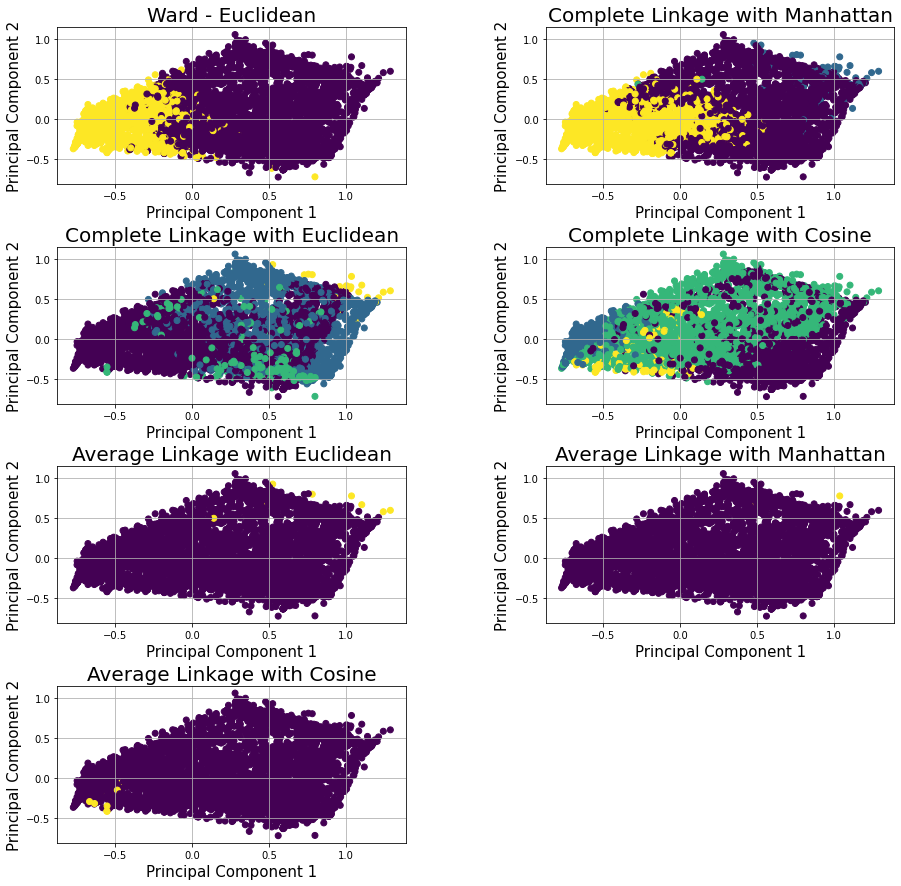

In [47]:
fig = plt.figure(figsize = (15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(4,2,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Ward - Euclidean', fontsize = 20)
ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=y1_hc)
ax.grid()

ax = fig.add_subplot(4,2,2) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Complete Linkage with Manhattan', fontsize = 20)
ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=y2_hc)
ax.grid()

ax = fig.add_subplot(4,2,3) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Complete Linkage with Euclidean', fontsize = 20)
ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=y3_hc)
ax.grid()

ax = fig.add_subplot(4,2,4) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Complete Linkage with Cosine', fontsize = 20)
ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=y4_hc)
ax.grid()

ax = fig.add_subplot(4,2,5) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Average Linkage with Euclidean', fontsize = 20)
ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=y5_hc)
ax.grid()

ax = fig.add_subplot(4,2,6) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Average Linkage with Manhattan', fontsize = 20)
ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=y6_hc)
ax.grid()

ax = fig.add_subplot(4,2,7) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Average Linkage with Cosine', fontsize = 20)
ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=y7_hc)
ax.grid()

# Approach 2  visualization 

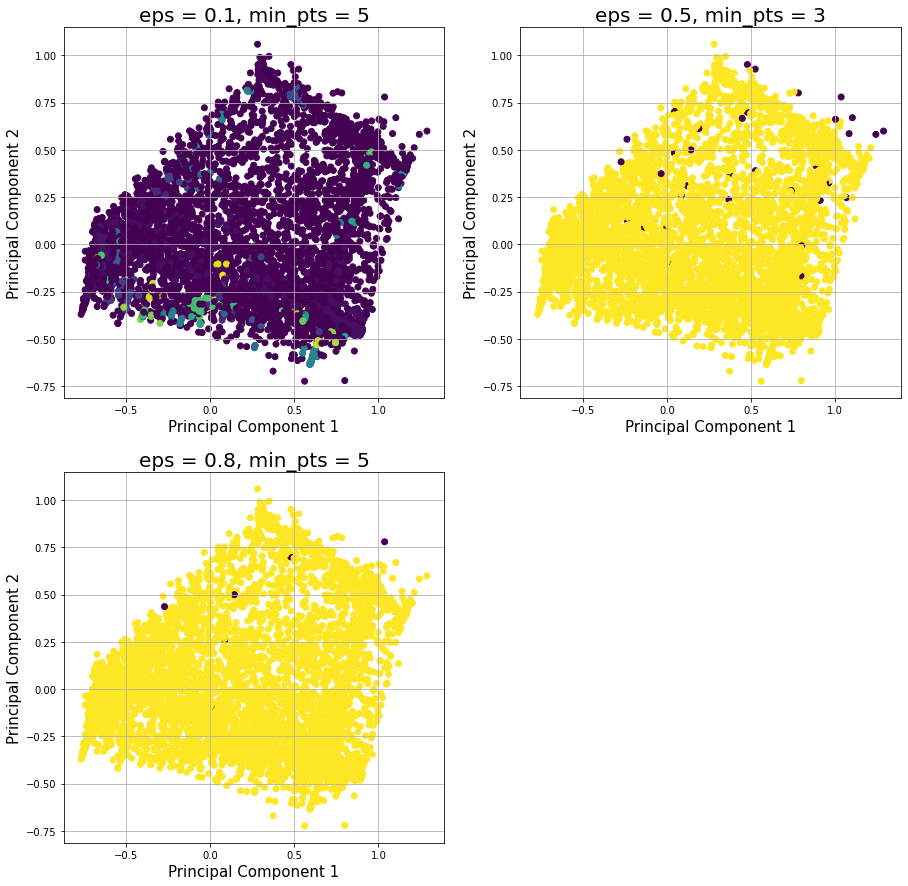

In [53]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(2,2,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('eps = 0.1, min_pts = 5', fontsize = 20)
ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=labels_1)
ax.grid()

ax = fig.add_subplot(2,2,2) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('eps = 0.5, min_pts = 3', fontsize = 20)
ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=labels_2)
ax.grid()

ax = fig.add_subplot(2,2,3) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('eps = 0.8, min_pts = 5', fontsize = 20)
ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=labels_3)
ax.grid()